# 互评作业2：频繁模式与关联规则挖掘
## 数据集1：[Deezer Dataset](https://snap.stanford.edu/data/gemsec-Deezer.html)
### 1.数据获取与预处理
读入json

In [3]:
import json

with open('data/deezer/genres.json','r') as f:
    json_data = json.load(f)

json_data

{'13357': ['Pop'],
 '11542': ['Indie Rock',
  'Indie Pop/Folk',
  'International Pop',
  'Rap/Hip Hop',
  'Pop',
  'Rock',
  'Indie Pop',
  'Alternative'],
 '11543': ['Dance', 'Pop', 'Rock'],
 '11540': ['International Pop', 'Jazz', 'Pop'],
 '11541': ['Rap/Hip Hop'],
 '11546': ['Dance',
  'Pop',
  'Techno/House',
  'International Pop',
  'Electro',
  'Singer & Songwriter'],
 '11547': ['Dance', 'Alternative', 'Indie Rock', 'Pop', 'Rock'],
 '11544': ['Films/Games',
  'Dance',
  'Rap/Hip Hop',
  'Contemporary R&B',
  'Pop',
  'International Pop',
  'R&B',
  'Rock',
  'Film Scores'],
 '11545': ['Pop'],
 '11548': ['Reggae', 'Rap/Hip Hop', 'Pop', 'Rock', 'Alternative', 'Folk'],
 '11549': ['Dance', 'Electro', 'Pop'],
 '5988': ['Pop', 'Rock'],
 '5989': ['Dance',
  'Rap/Hip Hop',
  'Pop',
  'Disco',
  'International Pop',
  'Rock',
  'Electro'],
 '19399': ['Folk', 'Pop'],
 '19398': ['Dance', 'Electro', 'Pop', 'Rock'],
 '5982': ['Pop'],
 '5983': ['Indie Pop/Folk', 'Dance', 'Rap/Hip Hop', 'Pop', '

对json文件进行预处理，转换成dataFrame

In [4]:
import pandas as pd
from tqdm import tqdm

deezer_genres = pd.DataFrame(columns=['TID','Transactrions'])
for key,value in tqdm(json_data.items()):
    deezer_genres.loc[len(deezer_genres)] = [key,value]
deezer_genres.head()

100%|██████████| 54573/54573 [01:09<00:00, 781.43it/s] 


,TID,Transactrions
0,13357,[Pop]
1,11542,"[Indie Rock, Indie Pop/Folk, International Pop..."
2,11543,"[Dance, Pop, Rock]"
3,11540,"[International Pop, Jazz, Pop]"
4,11541,[Rap/Hip Hop]


### 2.频繁项集挖掘
将项集进行onehot编码

In [5]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(deezer_genres['Transactrions']).transform(deezer_genres['Transactrions'])
deezer_df = pd.DataFrame(te_ary, columns=te.columns_)
deezer_df.head()

,Acoustic Blues,African Music,Alternative,Alternative Country,Asian Music,Baroque,Bluegrass,Blues,Bolero,Bollywood,...,Sports,TV Soundtracks,TV shows & movies,Techno/House,Traditional Country,Trance,Tropical,Urban Cowboy,Vocal jazz,West Coast
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


用apriori算法寻找min_support为30%时的频繁项集

In [6]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(deezer_df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.379437,(Alternative),1
1,0.496601,(Dance),1
2,0.360141,(Electro),1
3,0.866784,(Pop),1
4,0.387408,(Rap/Hip Hop),1
5,0.476389,(Rock),1
6,0.360123,"(Alternative, Pop)",2
7,0.328313,"(Dance, Electro)",2
8,0.450846,"(Dance, Pop)",2
9,0.330182,"(Electro, Pop)",2


### 3.结果分析与可视化展示
对挖掘结果进行可视化展示

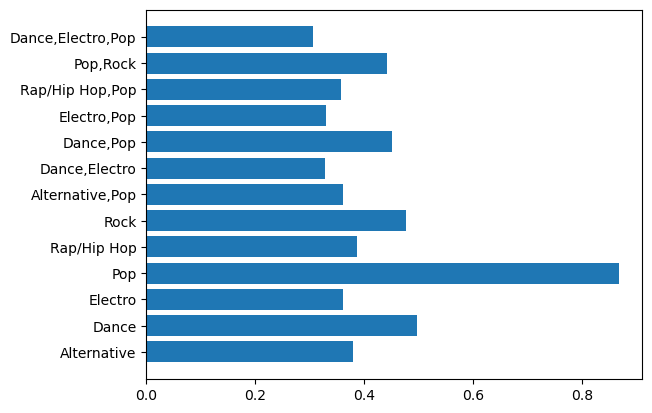

In [7]:
from matplotlib import pyplot as plt

def set_to_str(x):
    return ','.join(x)
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(set_to_str)
plt.barh(frequent_itemsets['itemsets_str'],frequent_itemsets['support'].astype(float))
plt.show()

可以发现，项集长度为1时最常出现的是'pop'流行音乐,其次是舞蹈和摇滚。而喜欢流行音乐的人常常也会喜欢摇滚或者舞蹈。有很多人同时喜欢流行、舞蹈和电子乐。

## 数据集2：[yelp Dataset](https://www.yelp.com/dataset/download)
### 1.数据获取与预处理

In [14]:
json_data = []
with open('data/yelp/business.json','r') as f:
    for index,line in enumerate(f.readlines()):
        json_data.append(json.loads(line))

json_data[0]

{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
 'name': 'Abby Rappoport, LAC, CMQ',
 'address': '1616 Chapala St, Ste 2',
 'city': 'Santa Barbara',
 'state': 'CA',
 'postal_code': '93101',
 'latitude': 34.4266787,
 'longitude': -119.7111968,
 'stars': 5.0,
 'review_count': 7,
 'is_open': 0,
 'attributes': {'ByAppointmentOnly': 'True'},
 'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
 'hours': None}

将json对象转换成dataFrame

In [40]:
yelp_df = pd.DataFrame(columns=['TID','Transactrions'])
for index, row in tqdm(enumerate(json_data),total=len(json_data)):
    if row['categories'] is not None:
        yelp_df.loc[len(yelp_df)] = [row['business_id'],row['categories'].split(',')]

yelp_df.head()

  0%|          | 231/150346 [00:00<01:04, 2310.00it/s]

100%|██████████| 150346/150346 [10:08<00:00, 246.88it/s]


,TID,Transactrions
0,Pns2l4eNsfO8kk83dixA6A,"[Doctors, Traditional Chinese Medicine, Natu..."
1,mpf3x-BjTdTEA3yCZrAYPw,"[Shipping Centers, Local Services, Notaries,..."
2,tUFrWirKiKi_TAnsVWINQQ,"[Department Stores, Shopping, Fashion, Home..."
3,MTSW4McQd7CbVtyjqoe9mw,"[Restaurants, Food, Bubble Tea, Coffee & Te..."
4,mWMc6_wTdE0EUBKIGXDVfA,"[Brewpubs, Breweries, Food]"


检查是否存在缺失值

In [41]:
missing_values = yelp_df.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['missing_count']).T
missing_values = missing_values.loc[:, (missing_values != 0).any(axis=0)]
missing_values

""
missing_count


### 2.频繁项集挖掘
将项集进行onehot编码

In [42]:
te_ary = te.fit(yelp_df['Transactrions']).transform(yelp_df['Transactrions'])
yelp_df_oh = pd.DataFrame(te_ary, columns=te.columns_)
yelp_df_oh.head()

,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


用apriori算法寻找min_support为4%时的频繁项集

In [53]:
frequent_yelp = apriori(yelp_df_oh, min_support=0.04, use_colnames=True)
frequent_yelp['length'] = frequent_yelp['itemsets'].apply(lambda x: len(x))
frequent_yelp

,support,itemsets,length
0,0.043290,( American (Traditional)),1
1,0.048748,( Automotive),1
2,0.060768,( Bars),1
3,0.065940,( Beauty & Spas),1
4,0.052102,( Event Planning & Services),1
5,0.139760,( Food),1
6,0.058785,( Health & Medical),1
7,0.070306,( Home Services),1
8,0.056948,( Local Services),1
9,0.066492,( Nightlife),1


### 3.结果分析与可视化展示
对挖掘结果进行可视化展示

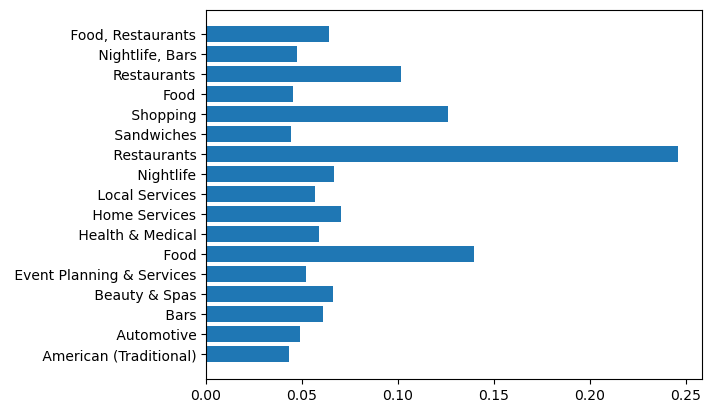

In [58]:
def set_to_str(x):
    return ','.join(x)
frequent_yelp['itemsets_str'] = frequent_yelp['itemsets'].apply(set_to_str)
plt.barh(frequent_yelp['itemsets_str'],frequent_yelp['support'].astype(float))
plt.show()

可以发现长度为2的频繁项集有Food和Restaurants以及Bars和Nightlife,说明这两对词互相之间存在一定的关联关系